In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([1,2,3,4,5])
Y = np.array([7,14,15,18,19])

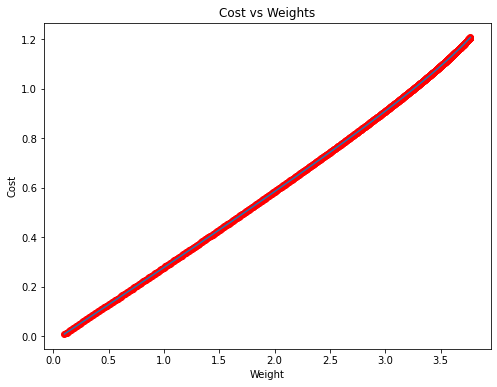

Estimated c =  1.2073951003350214
Estimated m =  3.7697826975552915


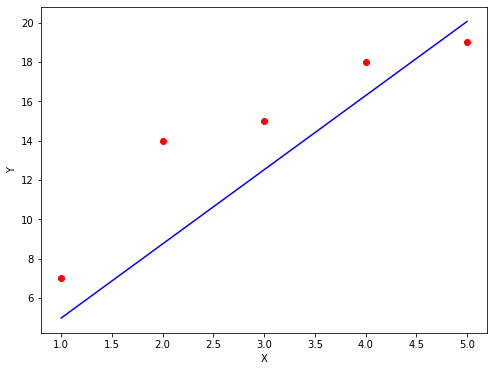

In [3]:
def mean_squared_error(y_actual, y_predicted):     # Calculating the cost
    n = len(y_actual)
    cost = np.sum((y_actual-y_predicted)**2) / n
    return cost

#q1=m, q0=c
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6) :
    current_m = 0.1
    current_c = 0.01
    iters = iterations
    lr = learning_rate
    n = float(len(x))
    prev_cost = None
    
    ms = []
    cs = []
    for i in range(iters):
        y_pred = (current_m * x) + current_c
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_pred)
        if prev_cost and abs(prev_cost - current_cost) <= stopping_threshold :
            break
         
        prev_cost = current_cost
 
        cs.append(current_c)
        ms.append(current_m)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_pred))
        bias_derivative = -(2/n) * sum(y-y_pred)
         
        # Updating weights and bias
        current_m = current_m - (lr * weight_derivative)
        current_c = current_c - (lr * bias_derivative)
                 
        
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(ms, cs)
    plt.scatter(ms, cs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_m, current_c

#main
estimated_m, estimated_c = gradient_descent(X, Y)
print("Estimated c = ", estimated_c)
print("Estimated m = ",estimated_m)

# Making predictions using estimated parameters
Y_pred = estimated_m*X + estimated_c

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()